<a id="1"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 10px 10px; font-weight:normal">SPACESHIP TITANIC</p>

---

#### **DESCRIPTION:**

_Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good._

_The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars._

_While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!_

#### **TASK:** 

_In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system._

#### **SEE MORE HERE:** 

https://www.kaggle.com/competitions/spaceship-titanic/overview

---

#### **TABLE OF CONTENTS:**

* [**1. EXPLORATORY DATA ANALYSIS (EDA)**](#eda)
  
  - [**1.1. GLANCE AT THE DATASET**](#glance-at-dataset)
  
  - [**1.2. FEATURE ENGINEERING**](#feature-engineering)
  
  - [**1.3. DATASET SUMMARY**](#dataset-summary)
  
* [**2. PREPROCESSING**](#preprocessing)
  
  - [**2.1. FEATURE ADDER CLASS FOR AUTOMATIC FEATURE ADDING**](#feature-adder)
  
  - [**2.2. TRANSFORMATION PIPELINES**](#transformation-pipelines)

* [**3. MACHINE LEARNING AND MODEL SELECTION**](#machine-learning)

  - [**3.1. MODEL SELECTION**](#model-selection)

  - [**3.2. MODEL TUNE**](#model-tune)

  - [**3.3. QUICK LOOK AT PRECISION AND RECALL**](#precision-recall)
  
  - [**3.4. FINAL PREDICTIONS**](#final-predictions)

---

<a id="eda"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 20px 20px; font-weight:normal">1. EXPLORATORY DATA ANALYSIS (EDA)</p>

---

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Minimal setup.</p>

In [71]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Indicates whether the notebook is running on Kaggle or not.
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None
MODELS_PATH = Path("models")
MODELS_PATH.mkdir(exist_ok=True)  # If directory exists, do nothing.
DARK_BLUE = "#141b4d"

MY_RC = {
    "axes.labelcolor": DARK_BLUE,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 10,
    "xtick.color": DARK_BLUE,
    "ytick.labelsize": 10,
    "ytick.color": DARK_BLUE,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 10,
    "font.family": "Serif",
    "text.color": DARK_BLUE,
}

sns.set_theme(rc=MY_RC)
sns.set_palette("crest_r")

<a id="glance-at-dataset"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 1.1. GLANCE AT THE DATASET </span></b>

In [197]:
train_path = "data/train.csv"
test_path = "data/test.csv"

if ON_KAGGLE:
    train_path = "/kaggle/input/spaceship-titanic/train.csv"
    test_path = "/kaggle/input/spaceship-titanic/test.csv"
    
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)


**Features Description:**

- **`PassengerId`**  
  _A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always._
- **`HomePlanet`**  
  _The planet the passenger departed from, typically their planet of permanent residence._
- **`CryoSleep`**  
  _Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins._
- **`Cabin`**  
  _The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard._
- **`Destination`**  
  _The planet the passenger will be debarking to._
- **`Age`**  
  _The age of the passenger._
- **`VIP`**  
  _Whether the passenger has paid for special VIP service during the voyage._
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, **`VRDeck`**  
  _Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities._
- **`Name`**  
  _The first and last names of the passenger._
- **`Transported`**  
  _Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict._

In [7]:
train_set.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train_set.isna().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's see which features are categorical and which are numerical.</p>

In [10]:
cat_features = train_set.select_dtypes("object").columns
print(*cat_features, sep=", ")


PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name


In [11]:
numerical_features = train_set.select_dtypes("number").columns
print(*numerical_features, sep=", ")


Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's have a look at categorical features closely.</p>

In [13]:
# I guess the `PassengerId`, `Name` and `Cabin` are mostly unique,
# so we can omit these here.
for cat_feature in cat_features.difference(["PassengerId", "Cabin", "Name"]):
    print(train_set[cat_feature].value_counts(), end="\n\n")


False    5439
True     3037
Name: CryoSleep, dtype: int64

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

False    8291
True      199
Name: VIP, dtype: int64



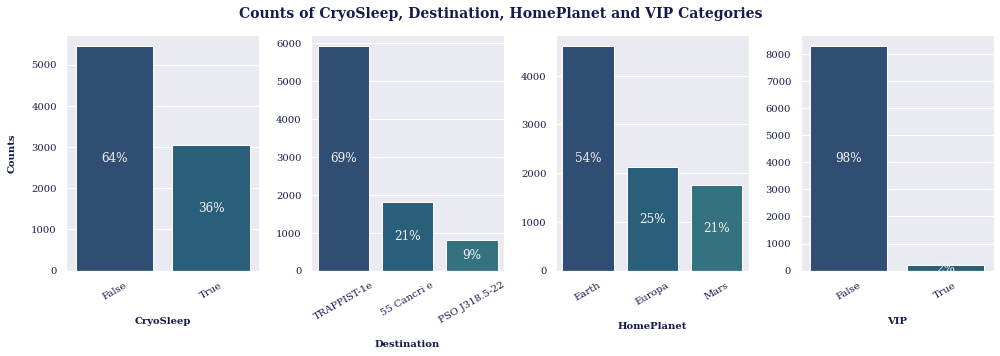

In [55]:
def plot_categories(features, axes):
    """Creates `countplot` for categories of the given features."""
    for i, (feature, axis) in enumerate(zip(features, axes.ravel())):
        plt.sca(axis)
        frequencies = train_set[feature].value_counts(normalize=True).round(2) * 100
        feature_plot = sns.countplot(x=train_set[feature], order=frequencies.index)
        elements = feature_plot.containers
        for element in elements:
            labels = frequencies.astype(int).astype(str) + "%"
            feature_plot.bar_label(
                element, label_type="center", labels=labels, fontsize=12, color="#f2f2f0"
            )
        plt.xticks(rotation=30)
        if i == 0:
            plt.ylabel("Counts")
        else:
            plt.ylabel("")


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 5), squeeze=False)
fig.suptitle("Counts of CryoSleep, Destination, HomePlanet and VIP Categories")
plot_categories(("CryoSleep", "Destination", "HomePlanet", "VIP"), axes)
plt.tight_layout()
plt.show()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">We can easily see that:</p>

* Almost 2/3 of passengers are not in cryosleep.
* The vast majority (~70%) of passengers go to the TRAPPIST-1e.
* More than half of passengers come from the Earth.
* Almost all (~98%) passengers do not have VIP status.

<p style="font-family: verdana; font-weight: bold; font-size: 14px">At first glance, it is reasonable to fill NaN values for these features with the most frequent strategy. Let's see the <code>Transported</code> label yet.</p>

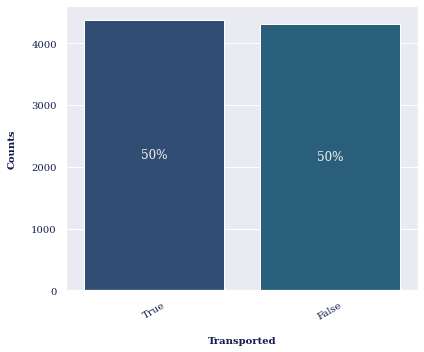

In [58]:
# With `squeeze=False` argument, axes object is always a 2D array.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), squeeze=False)
plot_categories(("Transported",), axes)
plt.tight_layout()
plt.show()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Transported/Not Transported ratio is perfectly balanced, so we'll choose the accuracy score as the classifier performance indicator.</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's see the remain categorical features i.e. <code>PassengerId</code>, <code>Name</code> and <code>Cabin</code>.</p>

In [59]:
for cat_feature in ("PassengerId", "Cabin", "Name"):
    print(
        f"{cat_feature} unique values: ".ljust(30),
        len(train_set[cat_feature].unique()),
        f"\t{len(train_set[cat_feature].unique()) / len(train_set[cat_feature]):.0%}",
    )


PassengerId unique values:     8693 	100%
Cabin unique values:           6561 	75%
Name unique values:            8474 	97%


<p style="font-family: verdana; font-weight: bold; font-size: 14px">As we can see, there are mostly unique values. We will handle these features later, in the Feature Engineering section.</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">We can read that the <i>"CryoSleep indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins"</i>. Let's see how a data frame looks for the passengers that are in CryoSleep. I suppose they should have zero values for the amenities like a <code>Spa</code> or <code>VRDeck</code>.</p>


In [60]:
amenities = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
train_set.loc[train_set["CryoSleep"] == True, amenities][:10]


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7,0.0,0.0,0.0,0.0,NaN
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,NaN,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,NaN,0.0,0.0
25,NaN,0.0,0.0,0.0,0.0
28,0.0,0.0,NaN,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Now let's have a look at how many NaN values there are.</p>

In [61]:
train_set.loc[train_set["CryoSleep"] == True, amenities].isna().sum()


RoomService     68
FoodCourt       70
ShoppingMall    96
Spa             65
VRDeck          62
dtype: int64

<p style="font-family: verdana; font-weight: bold; font-size: 14px">I think filling these NaN values for people in `CryoSleep` with zeros is more reasonable. Filling these with the median, in this case, has no sense. Moreover there is a probably good idea to merge these features into one another - for example Expenses.</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's take a look at the numerical features now.</p>


In [62]:
for method in ("mean", "median", "std"):
    value = getattr(train_set["Age"], method)()
    print(f"{method.upper()}:".ljust(15), f"{value:.2f}")


MEAN:           28.83
MEDIAN:         27.00
STD:            14.49


In [63]:
# For all passengers.
for feature in numerical_features.difference(["Age"]):
    print("Feature:".ljust(15), feature)
    for method in ("mean", "median", "std"):
        value = getattr(train_set[feature], method)()
        print(f"{method.upper()}:".ljust(15), f"{value:.2f}")
    print()


Feature:        FoodCourt
MEAN:           458.08
MEDIAN:         0.00
STD:            1611.49

Feature:        RoomService
MEAN:           224.69
MEDIAN:         0.00
STD:            666.72

Feature:        ShoppingMall
MEAN:           173.73
MEDIAN:         0.00
STD:            604.70

Feature:        Spa
MEAN:           311.14
MEDIAN:         0.00
STD:            1136.71

Feature:        VRDeck
MEAN:           304.85
MEDIAN:         0.00
STD:            1145.72



In [64]:
# For only those, that are not in CryoSleep .
not_in_cryosleep = train_set["CryoSleep"] == False
for feature in numerical_features.difference(["Age"]):
    print("Feature:".ljust(15), feature)
    for method in ("mean", "median", "std"):
        value = getattr(train_set.loc[not_in_cryosleep, feature], method)()
        print(f"{method.upper()}:".ljust(15), f"{value:.2f}")
    print()


Feature:        FoodCourt
MEAN:           713.00
MEDIAN:         5.00
STD:            1970.55

Feature:        RoomService
MEAN:           350.15
MEDIAN:         3.00
STD:            803.08

Feature:        ShoppingMall
MEAN:           270.59
MEDIAN:         2.00
STD:            741.76

Feature:        Spa
MEAN:           486.09
MEDIAN:         7.00
STD:            1396.23

Feature:        VRDeck
MEAN:           475.72
MEDIAN:         4.00
STD:            1404.17



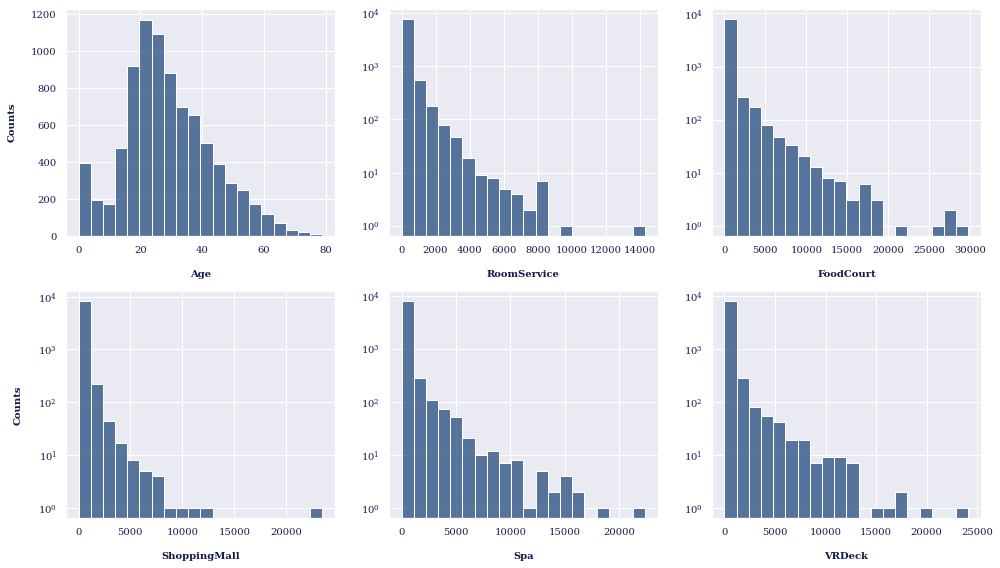

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
for numeric_feature, ax in zip(numerical_features, axes.ravel()):
    plt.sca(ax)
    sns.histplot(x=train_set[numeric_feature], bins=20)
    if not numeric_feature == "Age":
        plt.yscale("log")
    plt.ylabel("")

plt.sca(axes[0, 0])
plt.ylabel("Counts")
plt.sca(axes[1, 0])
plt.ylabel("Counts")
plt.tight_layout()
plt.show()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Quick summary of numerical features:</p>

- We see the `Age` feature has an interesting number of counts for the children (infants?).
- The majority of passengers spent little money on various amenities. The median value for each amenity is minimal (~0).
- Some passengers spend a lot of money on various amenities. The STD values are enormous concerning mean values.
- We can suspect a small percentage of passengers are rich.

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's have a look at something interesting.</p>

In [67]:
len(train_set.loc[np.isclose(train_set["Age"], 0.0), "Age"].index)


178

<p style="font-family: verdana; font-weight: bold; font-size: 14px">There are 178 embryos?</p>

In [68]:
correlations = train_set.corr()
correlations["Transported"].sort_values(ascending=False)


Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Spending more on luxury amenities, they were less prone to transport?</p>

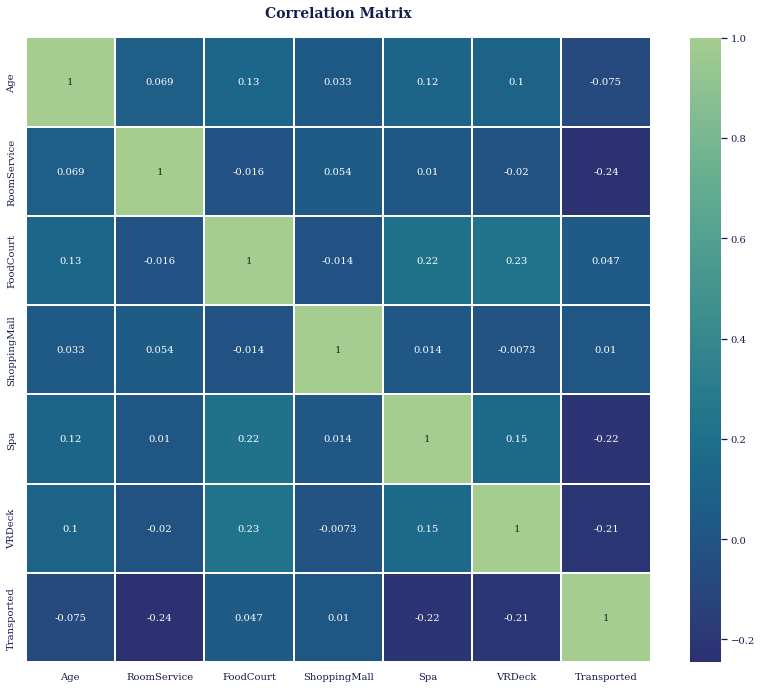

In [79]:
plt.figure(figsize=(14, 14))
sns.heatmap(
    correlations,
    square=True,
    linewidths=2,
    annot=True,
    cbar_kws={"shrink": 0.82},
    cmap="crest_r",
)
plt.title("Correlation Matrix", pad=20)
plt.show()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Summary. What should we do with available features:</p>

- **`PassengerId`**  
  Always unique and has no NaN values. An interesting allude is that people in a group often are family members. We try to extract these groups.
- **`HomePlanet`**  
  Categorical feature with three categories - planet names. More than 50% of passengers are from the Earth. It's reasonable to fill NaN values with the most frequent category (Earth).
- **`CryoSleep`**  
  Categorical feature (True/False). Around 64% of passengers are not in cryosleep. Let's fill NaN values with the most frequent value (False).
- **`Cabin`**  
  Categorical feature, but there are almost as many categories as instances. There are missing values. We will take a closer look at this. 
- **`Destination`**  
  Categorical feature with three categories - planet names. Around 70% of passengers are travelling to TRAPPIST-1e. We fill in missing values with this planet.
- **`Age`**  
  Numeric feature. We fill NaN values with the median. There are almost 200 passengers that are embryos.
- **`VIP`**  
  Categorical feature (True/False). Most (98%) don't have VIP status.
- **`Name`**  
  We should probably drop this feature now. We can split this feature into men and women when we have Polish names here, for example.
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, **`VRDeck`**  
  Numerical features. There is probably a good idea to fill NaN values for people with `CryoSleep=True` with zero. For the rest, fill with the median calculated for only those with `CryoSleep=False`.

---

<a id="feature-engineering"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 1.2. FEATURE ENGINEERING </span></b>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's create a copy to not overwrite or modify the original set.</p>

In [80]:
train_set_copy = train_set.copy()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Now let's look at the ratio of transported passengers regarding the categories of given features.</p>

In [81]:
home_planet_vs_transported = (
    train_set_copy[["HomePlanet", "Transported"]].groupby(["HomePlanet"]).mean()
)
cryosleep_vs_transported = (
    train_set_copy[["CryoSleep", "Transported"]].groupby(["CryoSleep"]).mean()
)
destination_vs_transported = (
    train_set_copy[["Destination", "Transported"]].groupby(["Destination"]).mean()
)
vip_vs_transported = train_set_copy[["VIP", "Transported"]].groupby(["VIP"]).mean()


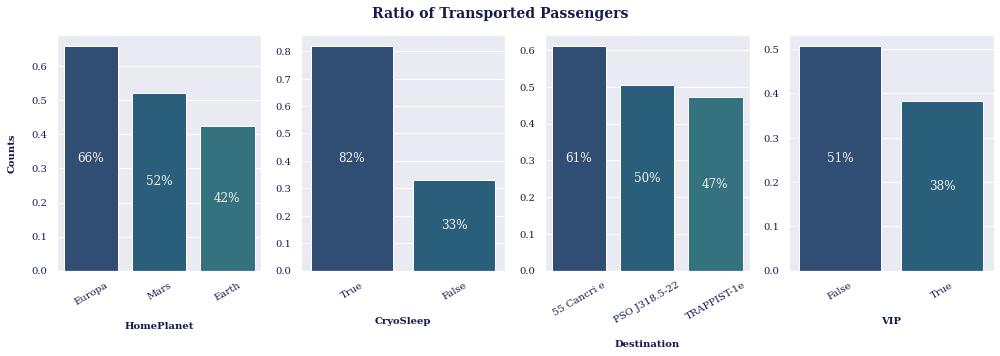

In [86]:
def plot_categories_vs_transported(features_vs_transported, axes):
    for i, (feature_vs_transported, axis) in enumerate(
        zip(features_vs_transported, axes.ravel())
    ):
        plt.sca(axis)
        feature_vs_transported = feature_vs_transported.sort_values(
            by="Transported", ascending=False
        )
        feature_plot = sns.barplot(
            x=feature_vs_transported.index,
            y=feature_vs_transported["Transported"],
            order=feature_vs_transported.index,
        )
        elements = feature_plot.containers
        for element in elements:
            labels = (
                (feature_vs_transported["Transported"].round(2) * 100)
                .astype(int)
                .astype(str)
            )
            feature_plot.bar_label(
                element,
                label_type="center",
                labels=labels + "%",
                fontsize=12,
                color="#f2f2f0",
            )
        plt.xticks(rotation=30)
        if i == 0:
            plt.ylabel("Counts")
        else:
            plt.ylabel("")


features_vs_transported = (
    home_planet_vs_transported,
    cryosleep_vs_transported,
    destination_vs_transported,
    vip_vs_transported,
)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 5), squeeze=False)
fig.suptitle("Ratio of Transported Passengers")
plot_categories_vs_transported(features_vs_transported, axes)
plt.tight_layout()
plt.show()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Woah! Around 82% of passengers in cryosleep were transported to an alternate dimension. As we remember, there were about 3000 passengers in cryosleep. It means that around 0.82 * 3000 = 2460 have been transported, haven't they?</p>


In [87]:
len(train_set_copy[(train_set_copy["CryoSleep"] == True) & 
                   (train_set_copy["Transported"] == True)])

2483

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Exactly!</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Now let's create some new features:</p>

- **`Expenses`** - The sum of the `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` and `VRDeck` features.
- **`HasExpenses`** - True for passengers with `Expenses>0`, False otherwise.
- **`IsEmbryo`** - True for passengers with `Age=0`. False otherwise.
- **`CabinDeck`** - Deck of the `Cabin` feature.
- **`CabinSide`** - Side of the `Cabin` feature.
- **`IsAlone`** - True for passengers who travelled alone, False otherwise. We try to extract this feature from the `PassengerId` and clues from its description.

<p style="font-family: verdana; font-weight: bold; font-size: 14px">And we will see if these are helpful.</p>

In [88]:
train_set_copy["Expenses"] = train_set_copy[amenities].sum(axis=1)
train_set_copy["HasExpenses"] = ~np.isclose(train_set_copy["Expenses"], 0.0)
has_expenses_vs_transpoted = (
    train_set_copy[["HasExpenses", "Transported"]].groupby(["HasExpenses"]).mean()
)


In [89]:
train_set_copy["IsEmbryo"] = np.isclose(train_set_copy["Age"], 0.0)
is_embryo_vs_transported = (
    train_set_copy[["IsEmbryo", "Transported"]].groupby(["IsEmbryo"]).mean()
)


In [90]:
train_set_copy[["CabinDeck", "CabinNum", "CabinSide"]] = (
    train_set_copy["Cabin"].str.split("/", expand=True)
)
cabin_deck_vs_transported = (
    train_set_copy[["CabinDeck", "Transported"]].groupby(["CabinDeck"]).mean()
)
cabin_side_vs_transported = (
    train_set_copy[["CabinSide", "Transported"]].groupby(["CabinSide"]).mean()
)


In [91]:
# Four first digits because: "... gggg_pp where gggg indicates a group..."
passenger_groups = train_set_copy["PassengerId"].str[:4]
# Only alone passengers have a unique group (thus 1).
is_alone = (passenger_groups.value_counts() == 1).reindex(passenger_groups)
train_set_copy["IsAlone"] = is_alone.tolist()
is_alone_vs_transported = (
    train_set_copy[["IsAlone", "Transported"]].groupby(["IsAlone"]).mean()
)


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's plot these new features.</p>

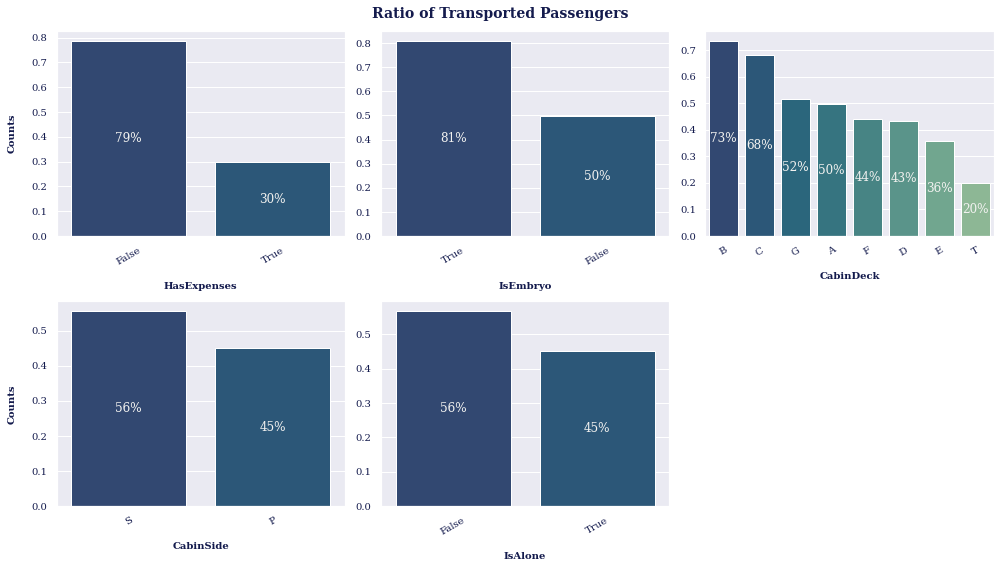

In [97]:
new_features_vs_transported = (
    has_expenses_vs_transpoted,
    is_embryo_vs_transported,
    cabin_deck_vs_transported,
    cabin_side_vs_transported,
    is_alone_vs_transported,
)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8), squeeze=False)
fig.suptitle("Ratio of Transported Passengers")
sns.set_palette("crest_r", n_colors=len(cabin_deck_vs_transported))
plot_categories_vs_transported(new_features_vs_transported, axes)
plt.sca(axes[1, 0])
plt.ylabel("Counts")
plt.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

In [98]:
for new_feature in ("HasExpenses", "IsEmbryo", "CabinDeck", "CabinSide", "IsAlone"):
    print(train_set_copy[new_feature].value_counts(), end="\n\n")


True     5040
False    3653
Name: HasExpenses, dtype: int64

False    8515
True      178
Name: IsEmbryo, dtype: int64

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

S    4288
P    4206
Name: CabinSide, dtype: int64

True     4805
False    3888
Name: IsAlone, dtype: int64



---

<a id="dataset-summary"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 1.3. DATASET SUMMARY </span></b>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">To sum up, what do we need to do with this dataset before putting it to ML algorithms:</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Existing features:</p>

- **`PassengerId`**  
  Nothing to do. To be removed at the final stage.
- **`HomePlanet`**  
  Fill in missing values with the most frequent category (Earth). Then apply OneHotEncoder.
- **`CryoSleep`**  
  Fill in missing values with the most frequent category (False). Then apply OrdinalEncoder.
- **`Cabin`**  
  Nothing to do. To be removed at the final stage.
- **`Destination`**  
  Fill in missing values with the most frequent category (TRAPPIST-1e). Then apply OneHotEncoder.
- **`Age`**  
  Fill in missing values with the median strategy. Then apply log1p transformer.
- **`VIP`**  
  Fill in missing values with the most frequent category (False). Then apply OrdinalEncoder.
- **`RoomService`**  
  Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- **`FoodCourt`**  
  Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- **`ShoppingMall`**  
  Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- **`Spa`**  
  Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- **`VRDeck`**  
  Fill in missing values for passengers in cryosleep with zero. For all others with the median. Then apply log1p transformer.
- **`Name`**  
  Nothing to do. To be removed at the final stage.
- **`Transported`**  
  Nothing to do. It is our label.

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Add new features (described earlier):</p>

- **`Expenses`**
- **`HasExpenses`**
- **`IsEmbryo`**
- **`CabinDeck`**
- **`CabinSide`**
- **`IsAlone`**

---

<a id="preprocessing"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 10px 10px; font-weight:normal">2. PREPROCESSING</p>

---

<a id="feature-adder"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 2.1. FEATURE ADDER CLASS FOR AUTOMATIC FEATURE ADDING </span></b>

In [203]:
# Let's remove the label.
train_labels = train_set["Transported"]
train_set = train_set.drop("Transported", axis=1)


<p style="font-family: verdana; font-weight: bold; font-size: 14px">We will create a <code>FeatureAdder</code> class to simply include new features into the dataset so that it will be compatible with Scikit-Learn transformers and pipelines. The following code should explain itself.</p>

In [208]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted


class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_expenses=True, add_is_embryo=True, 
                 add_cabin_split=True, add_is_alone=True):
        """Initialize which new features should be included."""
        self.add_expenses = add_expenses
        self.add_is_embryo = add_is_embryo
        self.add_cabin_split = add_cabin_split
        self.add_is_alone = add_is_alone

    def fit(self, X, y=None):
        """Calculates the median value for all of the amenities and only 
        for these passengers who are in CryoSleep."""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("X must be a pandas DataFrame.")
        
        not_in_cryosleep = (X["CryoSleep"] == False)
        self.amenity_medians_ = {
            "RoomService": X.loc[not_in_cryosleep, "RoomService"].median(),
            "FoodCourt": X.loc[not_in_cryosleep, "FoodCourt"].median(),
            "ShoppingMall": X.loc[not_in_cryosleep, "ShoppingMall"].median(),
            "Spa": X.loc[not_in_cryosleep, "Spa"].median(),
            "VRDeck": X.loc[not_in_cryosleep, "VRDeck"].median(),
        }
        
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = np.array(X.columns, dtype=object)
        
        return self
    
    def transform(self, X, y=None):
        """Returns a new `X` instance with included additional features."""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("X must be a pandas DataFrame.")
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features.")
        check_is_fitted(self)
        X = X.copy()
        
        if self.add_expenses:
            not_in_cryosleep = (X["CryoSleep"] == False)
            for amenity, median in self.amenity_medians_.items():
                X.loc[~not_in_cryosleep, amenity] = (
                    X.loc[~not_in_cryosleep, amenity].fillna(0.)
                )
                X.loc[not_in_cryosleep, amenity] = (
                    X.loc[not_in_cryosleep, amenity].fillna(median)
                )
            X["Expenses"] = X[self.amenity_medians_.keys()].sum(axis=1)
            X["HasExpenses"] = (X["Expenses"] > 0.)
            
        if self.add_is_embryo:
            X["IsEmbryo"] = np.isclose(X["Age"], 0.)
            
        if self.add_cabin_split:
            X[["CabinDeck", "CabinNum", "CabinSide"]] = (
                X["Cabin"].str.split("/", expand=True)
            )
            
        if self.add_is_alone:
            groups = X["PassengerId"].str[:4]
            is_alone = (groups.value_counts() == 1).reindex(groups)
            X["IsAlone"] = is_alone.tolist()
            
        return X
    
    def get_feature_names_out(self, input_features=None):
        if not input_features:
            names = getattr(self, "feature_names_in_")
            if self.add_expenses:
                names = np.r_[names, ["Expenses", "HasExpenses"]]
            if self.add_is_embryo:    
                names = np.r_[names, ["IsEmbryo"]]
            if self.add_cabin_split:
                names = np.r_[names, ["CabinDeck", "CabinNum", "CabinSide"]]
            if self.add_is_alone:
                names = np.r_[names, ["IsAlone"]]
            return names
        if len(input_features) != self.n_features_in_:
            raise ValueError("Invalid number of features.")
        if hasattr(self, "feature_names_in_") and not np.all(
            self.feature_names_in_ == input_features
        ):
            raise ValueError(
                "The `input_features` is not equal to `feature_names_in_`."
            )
        return np.r_[self.feature_names_in_, input_features]

---

<a id="transformation-pipelines"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 2.2. TRANSFORMATION PIPELINES </span></b>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Now we will create a transformation pipeline for automatic data preparation.</p>

In [205]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


hot_encoder_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder()
)
ord_encoder_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OrdinalEncoder()
)

# Scikit-learn and Python versions on Kaggle don't support `feature_names_out`.
if not ON_KAGGLE:
    log1p_transformer = FunctionTransformer(
        np.log1p, np.expm1, feature_names_out="one-to-one", check_inverse=False
    )
else:
    log1p_transformer = FunctionTransformer(np.log1p, np.expm1, check_inverse=False)

# This imputer applies the median strategy only when we decide to set
# `add_expenses=False` in the `FeatureAdder()` instance. `FeatureAdder()`
# fills NaN values for amenities by default.
amenity_pipeline = make_pipeline(SimpleImputer(strategy="median"), log1p_transformer)

# If you don't want some feature added by default by `FeatureAdder()`,
# you must set this in its constructor in the `preprocessing` pipeline.
# Moreover, you must discard this feature from the `feature_transformer` list too.
feature_transformer = make_column_transformer(  # Unlisted features are dropped.
    (hot_encoder_pipeline, ["HomePlanet", "Destination", "CabinDeck"]),
    (
        ord_encoder_pipeline,
        ["CryoSleep", "HasExpenses", "IsEmbryo", "IsAlone", "CabinSide"],
    ),
    (
        amenity_pipeline,
        ["Spa", "RoomService", "VRDeck", "FoodCourt", "ShoppingMall", "Expenses"],
    ),
)

preprocessing = make_pipeline(FeatureAdder(), feature_transformer)


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's see how it looks.</p>

In [209]:
train_set_prepared = preprocessing.fit_transform(train_set)

if not ON_KAGGLE:
    train_set_prepared_df = pd.DataFrame(
        train_set_prepared, columns=preprocessing.get_feature_names_out()
    )
    from IPython.display import display
    display(train_set_prepared_df.head())
else:
    print(train_set_prepared)

train_set_prepared.shape


,pipeline-1__HomePlanet_Earth,pipeline-1__HomePlanet_Europa,pipeline-1__HomePlanet_Mars,pipeline-1__Destination_55 Cancri e,pipeline-1__Destination_PSO J318.5-22,pipeline-1__Destination_TRAPPIST-1e,pipeline-1__CabinDeck_A,pipeline-1__CabinDeck_B,pipeline-1__CabinDeck_C,pipeline-1__CabinDeck_D,...,pipeline-2__HasExpenses,pipeline-2__IsEmbryo,pipeline-2__IsAlone,pipeline-2__CabinSide,pipeline-3__Spa,pipeline-3__RoomService,pipeline-3__VRDeck,pipeline-3__FoodCourt,pipeline-3__ShoppingMall,pipeline-3__Expenses
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,6.309918,4.700480,3.806662,2.302585,3.258097,6.602588
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,8.812248,3.784190,3.912023,8.182280,0.000000,9.248021
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,8.110728,0.000000,5.267858,7.157735,5.918894,8.551981
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,6.338594,5.717028,1.098612,4.262680,5.023881,6.995766


(8693, 25)

<p style="font-family: verdana; font-weight: bold; font-size: 14px">It looks like everything is fine here :)</p>

---

<a id="machine-learning"></a>
# <p style="padding:15px; background-color:#023047; font-family:fantasy; font-size:150%; color:#f2f2f0; text-align:center; border-radius: 10px 10px; font-weight:normal">3. MACHINE LEARNING AND MODEL SELECTION</p>

---

<a id="model-selection"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 3.1. MODEL SELECTION </span></b>


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's check several classifiers with default hyperparameters using 10-fold cross-validation.</p>

In [109]:
from sklearn.model_selection import cross_val_score


In [110]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, train_set_prepared, train_labels, cv=10)


In [111]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_scores = cross_val_score(svm_clf, train_set_prepared, train_labels, cv=10)


In [112]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_scores = cross_val_score(sgd_clf, train_set_prepared, train_labels, cv=10)


In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, train_set_prepared, train_labels, cv=10)


In [114]:
from sklearn.linear_model import LogisticRegression

lin_reg_clf = LogisticRegression(random_state=42, max_iter=1000)
lin_reg_scores = cross_val_score(lin_reg_clf, train_set_prepared, train_labels, cv=10)


In [115]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees_clf = ExtraTreesClassifier(random_state=42)
extra_trees_scores = cross_val_score(
    extra_trees_clf, train_set_prepared, train_labels, cv=10
)


In [116]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_clf, train_set_prepared, train_labels, cv=10)


In [117]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state=42)
ada_scores = cross_val_score(ada_clf, train_set_prepared, train_labels, cv=10)


In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(random_state=42)
gbc_scores = cross_val_score(gbc_clf, train_set_prepared, train_labels, cv=10)


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Now let's plot boxplots of these classifiers' scores.</p>

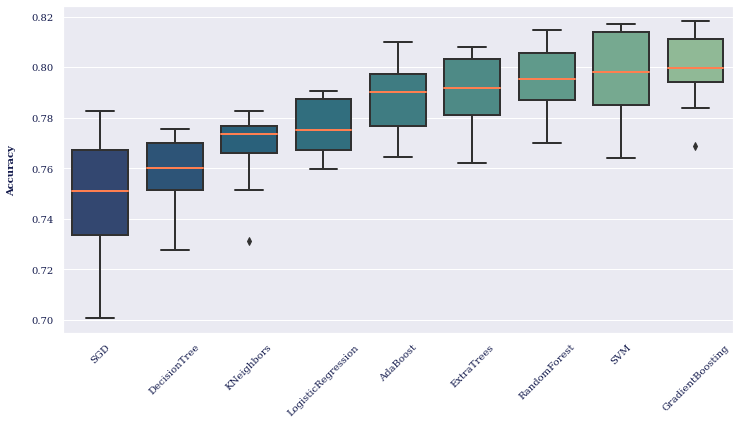

In [123]:
clf_scores = pd.DataFrame(
    {
        "RandomForest": forest_scores,
        "SVM": svm_scores,
        "SGD": sgd_scores,
        "KNeighbors": knn_scores,
        "LogisticRegression": lin_reg_scores,
        "ExtraTrees": extra_trees_scores,
        "DecisionTree": tree_scores,
        "AdaBoost": ada_scores,
        "GradientBoosting": gbc_scores,
    }
)

sorted_clfs = clf_scores.median().sort_values().index
clf_scores_sorted = clf_scores[sorted_clfs]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=clf_scores_sorted,
    palette="crest_r",
    width=0.75,
    fliersize=5,
    linewidth=2,
    medianprops={"color": "coral"},
)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


In [124]:
clf_scores_sorted.describe()


,SGD,DecisionTree,KNeighbors,LogisticRegression,AdaBoost,ExtraTrees,RandomForest,SVM,GradientBoosting
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.747497,0.757397,0.767978,0.776374,0.788341,0.790180,0.795127,0.796850,0.799500
std,0.028540,0.016120,0.015821,0.011466,0.015164,0.015729,0.013928,0.018324,0.014864
min,0.700806,0.727586,0.731034,0.759770,0.764368,0.762069,0.770115,0.764097,0.768966
25%,0.733548,0.751438,0.765890,0.767039,0.776661,0.781261,0.786883,0.784997,0.794195
50%,0.751005,0.760209,0.773432,0.775158,0.789988,0.791834,0.795167,0.798044,0.799770
75%,0.767328,0.770138,0.776755,0.787399,0.797468,0.803222,0.805811,0.813922,0.810990
max,0.782509,0.775604,0.782509,0.790564,0.810127,0.807825,0.814730,0.817031,0.818182


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's take <code>RandomForestClassifier</code>, <code>SVM</code> and <code>GradientBoostingClassifier</code> and try to play with their hyperparameters.</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's see yet which features are really important.</p>

In [125]:
if not ON_KAGGLE:
    forest_clf.fit(train_set_prepared, train_labels)
    feature_importances = forest_clf.feature_importances_
    feature_names = preprocessing.get_feature_names_out()
    # After preprocessing, features have additional prefixes from pipelines.
    feature_names = pd.Series(feature_names).str.extract("__(.*)").values.ravel()

    importances = sorted(
        zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True
    )

    for feature, importance in importances:
        print(feature.ljust(25), f"{importance:.5f}")


Expenses                  0.18482
Spa                       0.10983
FoodCourt                 0.10431
VRDeck                    0.09816
RoomService               0.09131
ShoppingMall              0.09009
HasExpenses               0.07327
CryoSleep                 0.05336
CabinSide                 0.02289
HomePlanet_Earth          0.02180
CabinDeck_F               0.01872
CabinDeck_G               0.01814
CabinDeck_E               0.01812
HomePlanet_Europa         0.01804
IsAlone                   0.01605
HomePlanet_Mars           0.01048
Destination_TRAPPIST-1e   0.01035
Destination_55 Cancri e   0.00998
CabinDeck_C               0.00654
Destination_PSO J318.5-22 0.00651
CabinDeck_B               0.00610
CabinDeck_D               0.00435
IsEmbryo                  0.00430
CabinDeck_A               0.00245
CabinDeck_T               0.00003


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Unfortunately you cannot see this on Kaggle notebook, but the results are as follows:</p>

Expenses                  - 0.18482  
Spa                       - 0.10983  
FoodCourt                 - 0.10431  
VRDeck                    - 0.09816  
RoomService               - 0.09131  
ShoppingMall              - 0.09009  
HasExpenses               - 0.07327  
CryoSleep                 - 0.05336  
CabinSide                 - 0.02289  
HomePlanet_Earth          - 0.02180  
CabinDeck_F               - 0.01872  
CabinDeck_G               - 0.01814  
CabinDeck_E               - 0.01812  
HomePlanet_Europa         - 0.01804  
IsAlone                   - 0.01605  
HomePlanet_Mars           - 0.01048  
Destination_TRAPPIST-1e   - 0.01035  
Destination_55 Cancri e   - 0.00998  
CabinDeck_C               - 0.00654  
Destination_PSO J318.5-22 - 0.00651  
CabinDeck_B               - 0.00610  
CabinDeck_D               - 0.00435  
IsEmbryo                  - 0.00430  
CabinDeck_A               - 0.00245  
CabinDeck_T               - 0.00003  

---

<a id="model-tune"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 3.2. MODEL TUNE </span></b>


In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon, reciprocal, uniform


<p style="font-family: verdana; font-weight: bold; font-size: 14px">We will start with the <code>RandomForestClassifier</code> first.</p>

In [ ]:
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(5, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 8),
    "max_leaf_nodes": randint(100, 400),
    "min_impurity_decrease": uniform(1e-5, 1e-4),
}

forest_rnd_search = RandomizedSearchCV(
    forest_clf,
    param_distributions=param_dist,
    cv=10,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy",
    random_state=42,
)
forest_rnd_search.fit(train_set_prepared, train_labels);


In [509]:
param_dist = {
    "C": uniform(10, 25),
    "gamma": ["auto", "scale"],
}

svm_rnd_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_dist,
    cv=10,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy",
    random_state=42,
)
svm_rnd_search.fit(train_set_prepared, train_labels);


In [510]:
param_dist = {
    "n_estimators": randint(100, 200),
    "learning_rate": reciprocal(0.001, 1.0),
    "max_depth": randint(5, 15),
    "max_leaf_nodes": randint(2, 12),
    "min_samples_split": randint(2, 12),
    "min_samples_leaf": randint(1, 8),
    "min_impurity_decrease": uniform(0.001, 0.1),
    "n_iter_no_change": randint(5, 15),
    "max_features": randint(10, 25),
}

gbc_rnd_search = RandomizedSearchCV(
    gbc_clf,
    param_distributions=param_dist,
    cv=10,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy",
    random_state=42,
)
gbc_rnd_search.fit(train_set_prepared, train_labels);


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's see on the results.</p>

In [511]:
best_scores = (
    forest_rnd_search.best_score_,
    svm_rnd_search.best_score_,
    gbc_rnd_search.best_score_,
)

best_classifiers = (
    forest_rnd_search.best_estimator_,
    svm_rnd_search.best_estimator_,
    gbc_rnd_search.best_estimator_,
)

print("ACCURACY SCORE:", end="\n\n")
for best_clf, best_score in zip(best_classifiers, best_scores):
    print(f"Best {best_clf.__class__.__name__}:".ljust(35), f"{best_score:.6f}")


<p style="font-family: verdana; font-weight: bold; font-size: 14px">And we can glance at best hyperparameters:</p>

In [512]:
print("BEST HYPERPARAMETERS:", "-" * 52, sep="\n")
for best_clf in (forest_rnd_search, svm_rnd_search, gbc_rnd_search):
    print("Classifier".ljust(25), best_clf.best_estimator_.__class__.__name__)
    for hyperparam, value in best_clf.best_params_.items():
        print(f"{hyperparam.ljust(25)}", value)
    print("-" * 52)


<p style="font-family: verdana; font-weight: bold; font-size: 14px">We can easily save these models with <code>joblib</code>. Thanks to this, we don't need to train classifiers (which takes around 15-20 minutes) whenever we use this notebook.</p>

In [513]:
import joblib

joblib.dump(forest_rnd_search.best_estimator_, MODELS_PATH / "best_forest.pkl")
joblib.dump(svm_rnd_search.best_estimator_, MODELS_PATH / "best_svm.pkl")
joblib.dump(gbc_rnd_search.best_estimator_, MODELS_PATH / "best_gbc.pkl");


<p style="font-family: verdana; font-weight: bold; font-size: 14px">And load them when we need them.</p>

In [ ]:
import joblib

best_forest = joblib.load(MODELS_PATH / "best_forest.pkl")
best_svm = joblib.load(MODELS_PATH / "best_svm.pkl")
best_gbc = joblib.load(MODELS_PATH / "best_gbc.pkl")


---

<a id="precision-recall"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 3.3. QUICK LOOK AT PRECISION AND RECALL </span></b>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">There we have a perfect ratio of Transported / Not Transported, and we use the accuracy score as the primary indicator, but it is good to know how looks different indicators like precision or recall.</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">Let's create predictions from the best classifiers.</p>

In [129]:
from sklearn.model_selection import cross_val_predict


forest_pred = cross_val_predict(best_forest, train_set_prepared, train_labels, cv=10)
svm_pred = cross_val_predict(best_svm, train_set_prepared, train_labels, cv=10)
gbc_pred = cross_val_predict(best_gbc, train_set_prepared, train_labels, cv=10)


<p style="font-family: verdana; font-weight: bold; font-size: 14px">And have a look at confusion matrices.</p>

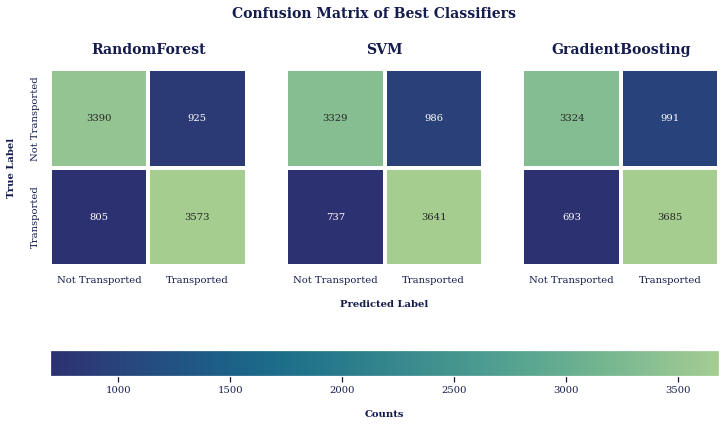

In [166]:
from matplotlib.gridspec import GridSpec
from sklearn.metrics import confusion_matrix


conf_matrix_forest = confusion_matrix(train_labels, forest_pred)
conf_matrix_svm = confusion_matrix(train_labels, svm_pred)
conf_matrix_gbc = confusion_matrix(train_labels, gbc_pred)

fig = plt.figure(figsize=(12, 6))  # , constrained_layout=True)
gs = GridSpec(nrows=2, ncols=3, figure=fig, height_ratios=(0.9, 0.1))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])
plt.subplots_adjust(hspace=0.5)

fig.suptitle("Confusion Matrix of Best Classifiers")

axes = (ax1, ax2, ax3)
conf_matrices = (conf_matrix_forest, conf_matrix_svm, conf_matrix_gbc)
titles = ("RandomForest", "SVM", "GradientBoosting")

for ax, conf_matrix, title in zip(axes, conf_matrices, titles):
    plt.sca(ax)
    plt.title(title)
    sns.heatmap(
        conf_matrix,
        square=True,
        linewidths=4,
        annot=True,
        cmap="crest_r",
        fmt=".0f",
        cbar=False,
    )
    plt.gca().set_xticklabels(["Not Transported", "Transported"])
    if ax == ax1:
        plt.gca().set_yticklabels(["Not Transported", "Transported"])
    else:
        plt.gca().set_yticklabels([])

plt.sca(ax1)
plt.ylabel("True Label")
plt.sca(ax2)
plt.xlabel("Predicted Label")

ax4.grid(False)
# We need to get a mappable obj (get_children).
fig.colorbar(ax3.get_children()[0], cax=ax4, orientation="horizontal", label="Counts")

plt.show()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Now we can calculate the precision, recall and F1 score. </p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">The precision measures the fraction of correct positive predictions out of all the model's positive predictions. In this case, positive prediction is <code>True</code> for the <code>Transported</code> label. Precision can answer a question: "How many samples labelled as positive by the model are actually positive?"</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">The recall measures the fraction of correct positive predictions out of all actually positive samples. It can answer a question: "How many samples out of all positives are labelled as positive by the model?"</p>

<p style="font-family: verdana; font-weight: bold; font-size: 14px">The F1 score is the harmonic mean of precision and recall. To obtain a high F1 score, both the precision and recall have to be high.</p>

In [167]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


forest_prec = precision_score(train_labels, forest_pred)
svm_prec = precision_score(train_labels, svm_pred)
gbc_prec = precision_score(train_labels, gbc_pred)

forest_rec = recall_score(train_labels, forest_pred)
svm_rec = recall_score(train_labels, svm_pred)
gbc_rec = recall_score(train_labels, gbc_pred)

forest_f1 = f1_score(train_labels, forest_pred)
svm_f1 = f1_score(train_labels, svm_pred)
gbc_f1 = f1_score(train_labels, gbc_pred)

forest_acc = accuracy_score(train_labels, forest_pred)
svm_acc = accuracy_score(train_labels, svm_pred)
gbc_acc = accuracy_score(train_labels, gbc_pred)

prec_rec_f1_acc = {
    "RandomForest": [forest_prec, forest_rec, forest_f1, forest_acc],
    "SVM": [svm_prec, svm_rec, svm_f1, svm_acc],
    "GradientBoosting": [gbc_prec, gbc_rec, gbc_f1, gbc_acc],
}

indicators_df = pd.DataFrame(
    prec_rec_f1_acc, index=["Precision", "Recall", "F1", "Accuracy"]
)
indicators_df


,RandomForest,SVM,GradientBoosting
Precision,0.794353,0.786903,0.788067
Recall,0.816126,0.831658,0.841709
F1,0.805092,0.808662,0.814005
Accuracy,0.800989,0.801795,0.806281


In [168]:
best_values = indicators_df.max(axis=1)
best_clfs = indicators_df.idxmax(axis=1)

for indicator, best_score, best_clf in zip(indicators_df.index, best_values, best_clfs):
    print(
        f"{indicator}:".ljust(15),
        f"Best Score: {best_score:.6f}".ljust(25),
        f"Classifier: {best_clf}",
    )


Precision:      Best Score: 0.794353      Classifier: RandomForest
Recall:         Best Score: 0.841709      Classifier: GradientBoosting
F1:             Best Score: 0.814005      Classifier: GradientBoosting
Accuracy:       Best Score: 0.806281      Classifier: GradientBoosting


<p style="font-family: verdana; font-weight: bold; font-size: 14px">Okay, so we see the <code>GradientBoostingClassifier</code> appears to have the best performance. It has the highest recall, which means it is the best at finding all positive cases. Moreover, it has comparable precision to the <code>RandomForestClassifier</code> and <code>SVC</code>, so it is making a similar number of false positive predictions. In addition, it has a higher F1 score even though the precision is lower than in the <code>RandomForestClassifier</code>. To sum up, GradientBoosting should best generalise new samples.</p>

In [169]:
# The `RandomForestClassifier` doesn't have the `decision_function`.
forest_roc_probas = cross_val_predict(
    best_forest, train_set_prepared, train_labels, cv=10, method="predict_proba"
)
svm_roc_scores = cross_val_predict(
    best_svm, train_set_prepared, train_labels, cv=10, method="decision_function"
)
gbc_roc_scores = cross_val_predict(
    best_gbc, train_set_prepared, train_labels, cv=10, method="decision_function"
)


In [170]:
# The `roc_curve` method takes: probability estimates of the positive class, confidence values,
# or non-thresholded measure of decisions (as returned by "decision_function") as we can
# read in its documentation. 
# So here we take the probabilities of positive class -> forest_roc_probas[:, 1]
# forest_roc_probas[:, 0] are probabilities for negative class.
forest_roc_scores = forest_roc_probas[:, 1]


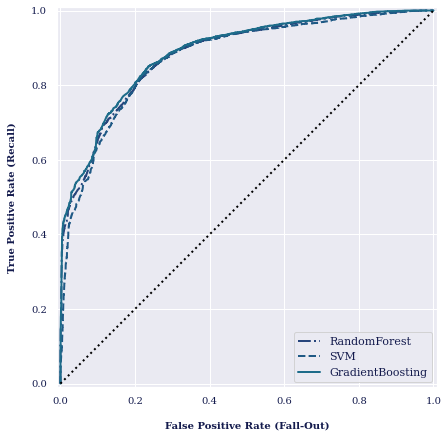

In [177]:
from sklearn.metrics import roc_curve

forest_fpr, forest_tpr, forest_thresholds = roc_curve(train_labels, forest_roc_scores)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(train_labels, svm_roc_scores)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(train_labels, gbc_roc_scores)

plt.figure(figsize=(7, 7))
plt.plot(forest_fpr, forest_tpr, linestyle="-.", linewidth=2, label="RandomForest")
plt.plot(svm_fpr, svm_tpr, linestyle="--", linewidth=2, label="SVM")
plt.plot(gbc_fpr, gbc_tpr, linestyle="solid", linewidth=2, label="GradientBoosting")
plt.plot([0, 1], [0, 1], linestyle=":", linewidth=2, color="black")
plt.gca().set_aspect(1)
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.axis([-0.01, 1.01, -0.01, 1.01])
plt.show()


In [178]:
from sklearn.metrics import roc_auc_score

forest_auc_score = roc_auc_score(train_labels, forest_roc_scores)
svm_auc_score = roc_auc_score(train_labels, svm_roc_scores)
gbc_auc_score = roc_auc_score(train_labels, gbc_roc_scores)

auc_indicators = pd.DataFrame(
    {
        "RandomForest": forest_auc_score,
        "SVM": svm_auc_score,
        "GradientBoosting": gbc_auc_score,
    },
    index=["Auc"],
)

indicators_df = pd.concat([indicators_df, auc_indicators])
indicators_df


,RandomForest,SVM,GradientBoosting
Precision,0.794353,0.786903,0.788067
Recall,0.816126,0.831658,0.841709
F1,0.805092,0.808662,0.814005
Accuracy,0.800989,0.801795,0.806281
Auc,0.882935,0.874485,0.888348


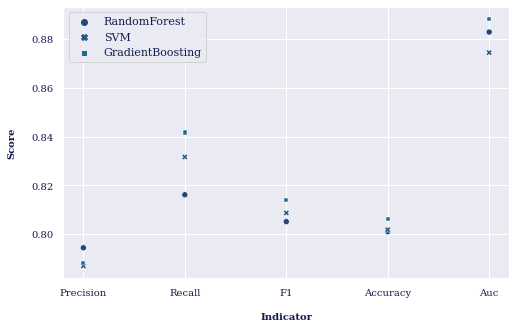

In [179]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=indicators_df)
plt.xlabel("Indicator")
plt.ylabel("Score")
plt.show()


<p style="font-family: verdana; font-weight: bold; font-size: 14px">As we can see, the <code>GradientBoostingClassifier</code> should be the best. It won in 4/5 performances.</p>

In [180]:
final_model = best_gbc


---

<a id="final-predictions"></a>
## <b><span style='padding:10px; background-color:#023047; font-family:fantasy; font-weight:normal; color:#f2f2f0; border-radius: 10px 10px;'> 3.4. FINAL PREDICTIONS </span></b>

In [210]:
test_set_prepared = preprocessing.transform(test_set)
results = final_model.predict(test_set_prepared)

sumbission = pd.DataFrame(
    {"PassengerId": test_set["PassengerId"], "Transported": results}
)
sumbission.set_index("PassengerId").to_csv("submission.csv")


---